# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [170]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, zscore

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf


%matplotlib inline

In [171]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


##### <span style="color: blue;">1. Criar a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em tip, explicada por sex, smoker, diner e net_bill.</span>

In [173]:
y, X = patsy.dmatrices('tip_pct ~ sex + smoker + time + net_bill + 1', tips)

In [174]:
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

##### <span style="color: blue;"> 2. Remover as variáveis não significantes.</span>

In [176]:
y, X = patsy.dmatrices(formula_like='tip ~ net_bill', data = tips)

modelo_sm1 = sm.OLS(y, X).fit()
modelo_sm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           5.02e-23
Time:                        17:50:01   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### <span style="color: blue;"> 3. Observe o gráfico de resíduos em função de net_bill </span>

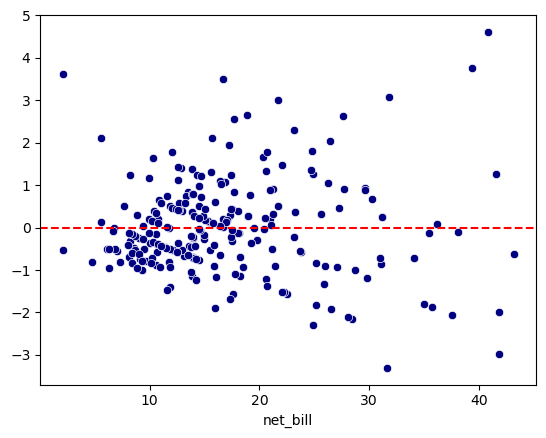

In [178]:
sns.scatterplot(x='net_bill', 
                y=modelo_sm1.resid, 
                data=tips,
               color = 'navy')
plt.axhline(y=0, 
            color='red', 
            linestyle='--')

plt.show()

##### <span style="color: blue;">4. Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.</span>

In [180]:
y, X = patsy.dmatrices(formula_like='tip ~ np.log(net_bill)', 
                       data=tips)

modelo_sm1_log = sm.OLS(y, X).fit()
modelo_sm1_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           4.40e-20
Time:                        17:50:01   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
y, X = patsy.dmatrices(formula_like='tip ~ net_bill + np.power(net_bill, 2)', 
                       data=tips)

modelo_sm1_pow = sm.OLS(y, X).fit()
modelo_sm1_pow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           4.96e-22
Time:                        17:50:01   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0743      0.353      3.039      0.003       0.378       1.770
net_bill                  0.1288      0.037      3.493      0.001       0.056       0.202
np.power(net_bill, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [182]:
print('`modelo_sm1_log` R-squared:', modelo_sm1_log.rsquared)
print('`modelo_sm1_pow` R-squared:', modelo_sm1_pow.rsquared)

`modelo_sm1_log` R-squared: 0.2944412513792952
`modelo_sm1_pow` R-squared: 0.3344216007656948


##### <span style="color: green;"> Um R-quadrado mais alto indica um melhor ajuste do modelo aos dados. Neste caso, modelo_sm1_pow tem um valor de R-quadrado ligeiramente mais alto, sugerindo que pode ser um ajuste melhor comparado a modelo_sm1_log. No entanto, ambos os valores são relativamente baixos, indicando que nenhum dos modelos explica uma grande parte da variância na variável dependente.</span>

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

##### <span style="color: blue;">1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.

In [186]:
y, X = patsy.dmatrices(formula_like='np.log(tip) ~ sex + smoker + time + net_bill', 
                       data=tips)

modelo_sm2 = sm.OLS(y, X).fit()
modelo_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           1.21e-18
Time:                        17:50:01   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### <span style="color: blue;">2. Remova as variáveis não significantes.


In [188]:
# y, X = patsy.dmatrices(formula_like='np.log(tip) ~ sex + smoker + time + net_bill', data=tips)
y, X = patsy.dmatrices(formula_like='np.log(tip) ~ net_bill', 
                       data=tips)

modelo_sm2 = sm.OLS(y, X).fit()
modelo_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           2.60e-21
Time:                        17:50:01   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### <span style="color: blue;">3. Observe o gráfico de resíduos em função de ```net_bill```


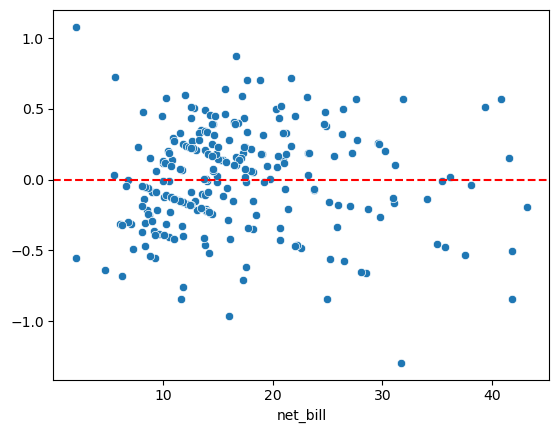

In [190]:
sns.scatterplot(x='net_bill', 
                y=modelo_sm2.resid, 
                data=tips)
plt.axhline(y=0, 
            color='r', 
            linestyle='--')

plt.show()

##### <span style="color: blue;">4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.


In [192]:
y, X = patsy.dmatrices(formula_like='np.log(tip) ~ np.log(net_bill)', 
                       data=tips)

modelo_sm2_log = sm.OLS(y, X).fit()
modelo_sm2_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           5.62e-22
Time:                        17:50:01   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
y, X = patsy.dmatrices(formula_like='np.log(tip) ~ net_bill + np.power(net_bill,2)', 
                       data=tips)

modelo_sm2_pow = sm.OLS(y, X).fit()
modelo_sm2_pow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           2.82e-22
Time:                        17:50:01   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1887      0.111      1.698      0.091      -0.030       0.408
net_bill                  0.0655      0.012      5.642      0.000       0.043       0.088
np.power(net_bill, 2)    -0.0008      0.000     -3.129      0.002      -0.001      -0.000
==============================================================================
Omnibus:                        5.692   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                7.934
Skew:                          -0.100   Prob(JB):                       0.0189
Kurtosis:                       3.860   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [194]:
print('`modelo_sm2_log` R-squared:', modelo_sm2_log.rsquared)
print('`modelo_sm2_pow` R-squared:', modelo_sm2_pow.rsquared)

`modelo_sm2_log` R-squared: 0.3191910159472313
`modelo_sm2_pow` R-squared: 0.337524395160816


##### <span style="color: green;">Indica que o modelo_sm2_pow tem um ajuste ligeiramente melhor do que o modelo_sm2_log, pois o valor de ```𝑅2```   é um pouco maior. No entanto, ambos os valores são relativamente baixos, sugerindo que os modelos podem não estar explicando bem a variabilidade dos dados.</span>

##### <span style="color: blue;">5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [197]:
tips['pred_tip_log'] = np.exp(modelo_sm2_log.fittedvalues)

print('`modelo_sm2_log` R-squared:',
      tips[['pred_tip_log', 'tip']].corr().iloc[0,1]**2)

tips['pred_tip_pow'] = np.exp(modelo_sm2_pow.fittedvalues)
print('`modelo_sm2_pow` R-squared:',
      tips[['pred_tip_pow', 'tip']].corr().iloc[0,1]**2)

`modelo_sm2_log` R-squared: 0.32837743855275575
`modelo_sm2_pow` R-squared: 0.32908491114682004


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

##### <span style="color: blue;"> 2.1 Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip, explicado por sex, smoker, diner e net_bill.

In [200]:
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)
modelo = sm.OLS(y,X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           1.21e-18
Time:                        17:50:01   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.

##### <span style="color: blue;"> 2.2 Remova as variáveis não significantes.

In [202]:
y, X = patsy.dmatrices('np.log(tip) ~ net_bill', tips)
modelo = sm.OLS(y,X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           2.60e-21
Time:                        17:50:01   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.0

##### <span style="color: blue;"> 2.3 Observe o gráfico de resíduos em função de net_bill

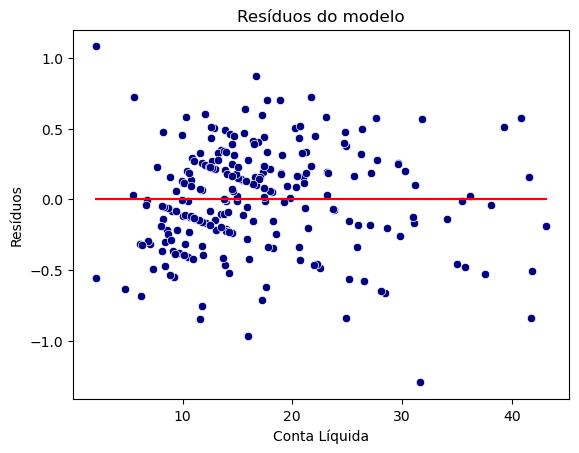

In [204]:
# Analisando os resíduos
x = tips.net_bill
y = modelo.resid

sns.scatterplot(
    x=x,
    y=y,
    color = 'navy'
)

plt.plot(x, [0]*len(y), '-r')

plt.title("Resíduos do modelo")
plt.xlabel("Conta Líquida")
plt.ylabel("Resíduos")
plt.show()

##### <span style="color: blue;"> 2.4 Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

In [206]:
y, X = patsy.dmatrices('np.log(tip) ~ np.power(net_bill, 2)', tips)
modelo = sm.OLS(y,X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     80.67
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           7.70e-17
Time:                        17:50:02   Log-Likelihood:                -108.16
No. Observations:                 244   AIC:                             220.3
Df Residuals:                     242   BIC:                             227.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.78

In [207]:
y, X = patsy.dmatrices('np.log(tip) ~ np.log(net_bill)', tips)
modelo = sm.OLS(y,X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           5.62e-22
Time:                        17:50:02   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

##### <span style="color: blue;"> 2.5 Do modelo final deste item, calcule o  ```R2``` na escala de tip (sem o log)  Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação <span/>?

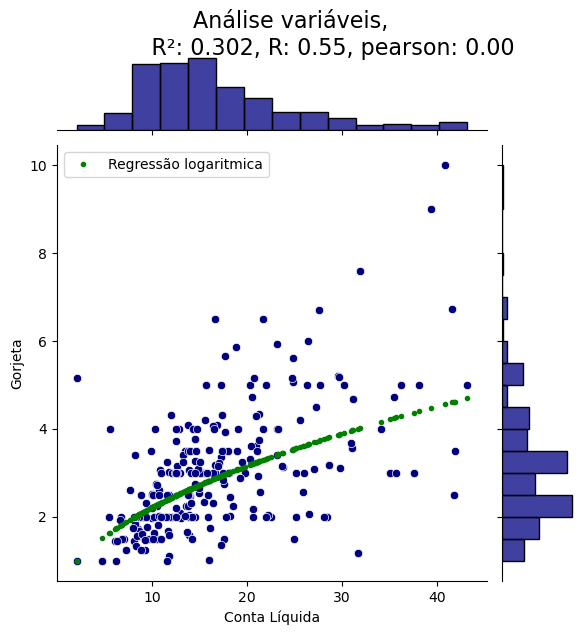

In [246]:

x = tips.net_bill
y = tips.tip
pred = np.exp(modelo.fittedvalues)

sns.jointplot(
    x=x,
    y=y,
    color = 'navy'
)

plt.plot(x, pred, '.g', label='Regressão logaritmica')

plt.legend(loc="upper left")

r_square = r2_score(y, pred)
_, p = pearsonr(y, pred)
title = f'''Análise variáveis,
            R²: {r_square:.3f}, R: {r_square**0.5:.2f}, pearson: {p:.2f}
        '''
plt.suptitle(title, y=1.05, size=16)

plt.xlabel("Conta Líquida")
plt.ylabel("Gorjeta")

plt.show()

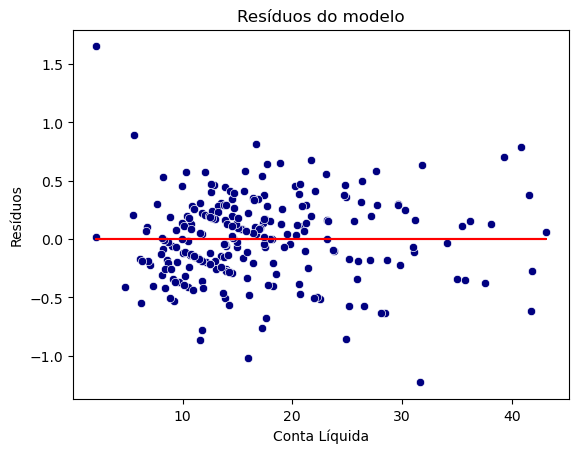

In [252]:
# Analisando os resíduos
x = tips.net_bill
y = modelo.resid

sns.scatterplot(
    x=x,
    y=y,
    color = 'navy'
)

plt.plot(x, [0]*len(y), '-r')

plt.title("Resíduos do modelo")
plt.xlabel("Conta Líquida")
plt.ylabel("Resíduos")
plt.show()

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [269]:
df = pd.read_csv('previsao_de_renda.csv')
print(df.shape)
df.head()

(15000, 15)


,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [293]:
# 
df_renda = df.dropna()
print(df_renda.shape)

(12427, 15)


##### <span style="color: blue;"> 3.1 Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário. <span/>

In [295]:
modelo = smf.ols('''
                    renda ~ tempo_emprego
                  ''', df_renda).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:55:11   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409

##### <span style="color: blue;"> 3.2 Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?

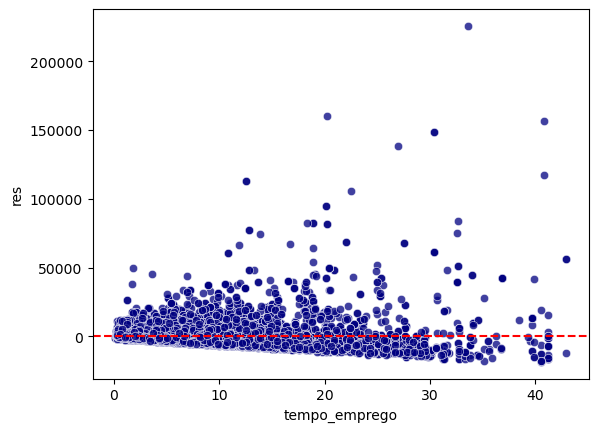

In [299]:
df_renda['res'] = modelo.resid
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df_renda, alpha = .75, color ='navy')
plt.axhline(y=0, color='r', linestyle='--')

In [301]:
y, X = patsy.dmatrices('np.log(renda) ~ tempo_emprego + np.power(idade,2) + estado_civil + C(sexo)', df_renda)
X

DesignMatrix with shape (12427, 8)
  Columns:
    ['Intercept',
     'estado_civil[T.Separado]',
     'estado_civil[T.Solteiro]',
     'estado_civil[T.União]',
     'estado_civil[T.Viúvo]',
     'C(sexo)[T.M]',
     'tempo_emprego',
     'np.power(idade, 2)']
  Terms:
    'Intercept' (column 0)
    'estado_civil' (columns 1:5)
    'C(sexo)' (column 5)
    'tempo_emprego' (column 6)
    'np.power(idade, 2)' (column 7)
  (to view full data, use np.asarray(this_obj))

In [303]:
y, X = patsy.dmatrices('np.log(renda) ~ tempo_emprego + standardize(idade) + C(sexo)', df_renda)

modelo_log = sm.OLS(y,X).fit()

print(modelo_log.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     2162.
Date:                Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:56:33   Log-Likelihood:                -13706.
No. Observations:               12427   AIC:                         2.742e+04
Df Residuals:                   12423   BIC:                         2.745e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.5100      0

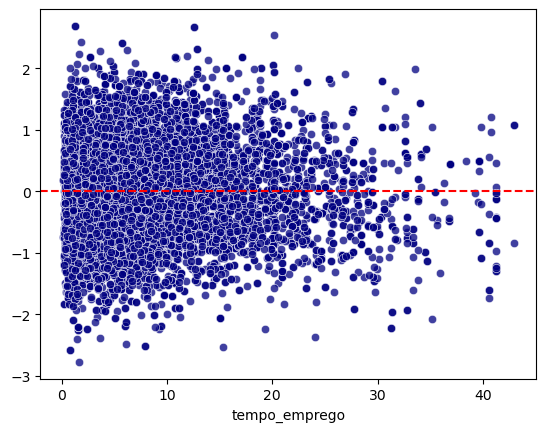

In [312]:
res_log = modelo_log.resid
sns.scatterplot(x = df_renda['tempo_emprego'], y = res_log, alpha = .75, color ='navy')
plt.axhline(y=0, color='r', linestyle='--')

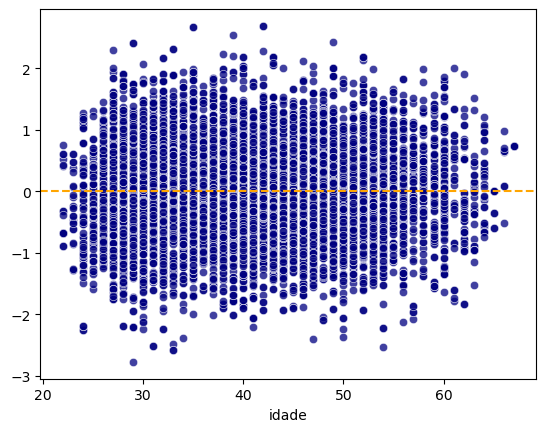

In [332]:
sns.scatterplot(x = df_renda['idade'], y = res_log, alpha = .75, color ='navy')
plt.axhline(y=0, color='orange', linestyle='--')